In [1]:
from knowknow.datastore import *

In [45]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
top100 = biggest_cits(filt=FILT.big3america, what=Cit.author, N=100)
top100 = [x[0] for x in top100]

In [4]:
dd = count_docs(
    filt=FILT.big3america + [(Cit.author, top100[:15])], 
    by={"a":Cit.author, "y":Doc.year}
)

In [5]:
dd_decade = dd.groupby([(dd.y//10)*10, dd.a])['count'].sum().reset_index()

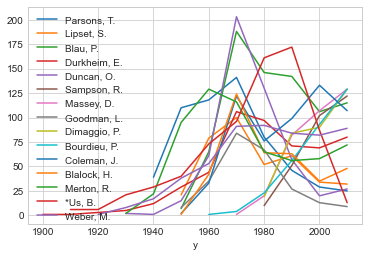

In [6]:
fig, ax = plt.subplots()
for auth in set(dd['a']):
    dd_decade[dd_decade.a==auth].plot('y','count', label=auth, ax=ax)
plt.show()

In [7]:
print("Top authors:")
print()
print(" ".join("<%s>"%x for x in top100))

Top authors:

<*Us, B.> <Blau, P.> <Parsons, T.> <Weber, M.> <Coleman, J.> <Durkheim, E.> <Duncan, O.> <Merton, R.> <Massey, D.> <Sampson, R.> <Goodman, L.> <Bourdieu, P.> <Blalock, H.> <Lipset, S.> <Dimaggio, P.> <Tilly, C.> <Mcadam, D.> <Goffman, E.> <Sewell, W.> <Granovetter, M.> <Portes, A.> <Meyer, J.> <Lieberson, S.> <Becker, G.> <Hannan, M.> <Wilson, W.> <Burt, R.> <Allison, P.> <*Us, D.> <Davis, J.> <Hauser, R.> <Kohn, M.> <Homans, G.> <Simmel, G.> <Park, R.> <Becker, H.> <England, P.> <Lenski, G.> <Ridgeway, C.> <Farley, R.> <Stinchcombe, A.> <Glenn, N.> <Gamson, W.> <Marx, K.> <Kalleberg, A.> <Alba, R.> <Turner, R.> <Berger, J.> <Logan, J.> <Skocpol, T.> <Mccarthy, J.> <Collins, R.> <White, H.> <Reskin, B.> <Snow, D.> <Davis, K.> <Hawley, A.> <Warner, W.> <Gibbs, J.> <Lazarsfeld, P.> <Jencks, C.> <Featherman, D.> <Hagan, J.> <Marsden, P.> <Sorokin, P.> <Wright, E.> <Elder, G.> <Abbott, A.> <Fligstein, N.> <South, S.> <Laumann, E.> <Fischer, C.> <Giddens, A.> <Stark, R.> <Hout

In [24]:
from random import choice
to_examine = choice(top100)

In [25]:
print(to_examine)

Logan, J.


In [26]:
mydocs = count_cits(
    filt=[(Cit.author, to_examine)], #+FILT.big3america 
    by={"ref":Cit.full_ref, "y":Doc.year},
    min_count=5
)

In [27]:
cited_works = set(mydocs.ref)

In [28]:
def year_sequences(docs, by=None, min_year=1950, max_year=2020):
    from collections import defaultdict
    # just group by __everything__, if not otherwised specified
    if by is None:
        by = set(docs.columns).difference({'count','y'})
        by = [getattr(docs, x) for x in by]
        
    ret = []
    for name, counts in docs.groupby(by):
        cy = defaultdict(int, {x.y: x['count'] for i, x in counts.iterrows()})
        cy = [cy[yy] for yy in range(min_year,2020)]
        ret.append( (name, cy) )
        
    return ret

In [29]:
cy = year_sequences(mydocs, min_year=2000)

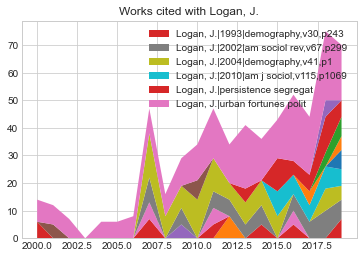

In [30]:
plt.stackplot(range(2000,2020),*[x[1] for x in cy], labels=[x[0] if sum(x[1]) > 20 else None for x in cy]);
plt.title("Works cited with %s" % to_examine)
plt.legend();

In [22]:
FILT.big3america

[(<CharField: Doc.journal>,
  ['american journal of sociology',
   'american review of sociology',
   'social forces'])]

In [42]:
g = bib_network(
    filt = [(Cit1.author, top100[:10]), (Cit2.author, top100[:10])],
    cited_ent = 'author'
)

In [52]:
# grab an egonet

g2 = bib_network(
    filt = [(Cit1.author, to_examine)],
    cited_ent = 'author',
    min_cocit = 10
)

In [68]:
# random hundo and plot the subnetworks there...
# problem: can't filter by more than 999 entities...

from random import sample
to_network = sample(g2.nodes, 100)

g3 = bib_network(
    filt = [(Cit1.author, to_network),(Cit2.author, to_network)],
    cited_ent = 'author',
    min_cocit = 10
)

In [61]:
G = g3

In [62]:
import networkx as nx

In [67]:
nx.write_graphml(G, 'test.graphml')

[('*Stat, S.', 6), ('Grusky, D.', 17), ('Kao, G.', 18), ('Poston, D.', 11), ('Zhou, X.', 15), ('Albrecht, D.', 12), ('Bianchi, S.', 28), ('Brown, D.', 38), ('Cohen, P.', 25), ('Freeman, R.', 34), ('Green, G.', 17), ('Hamilton, L.', 16), ('Hawley, A.', 27), ('Saenz, R.', 10), ('Wilkinson, K.', 12), ('Alonso, W.', 4), ('Amin, A.', 10), ('Anderson, E.', 47), ('Berger, P.', 41), ('Dear, M.', 4), ('Etzioni, A.', 29), ('Hannerz, U.', 16), ('Marcuse, P.', 7), ('Roberts, J.', 14), ('Auletta, K.', 4), ('Beck, E.', 18), ('Braithwaite, J.', 13), ('Brooksgunn, J.', 14), ('Burke, M.', 5), ('Conley, D.', 28), ('Dahl, R.', 21), ('Davis, G.', 23), ('Davis, J.', 41), ('De, J.', 8), ('Fordham, S.', 11), ('Friedman, M.', 21), ('Glaser, B.', 33), ('Hill, M.', 20), ('Hill, R.', 23), ('Holzer, H.', 19), ('Jackman, M.', 16), ('Johnson, J.', 25), ('Lewis, A.', 15), ('Light, I.', 30), ('Lofland, J.', 20), ('Milgram, S.', 15), ('Osgood, D.', 6), ('Patterson, E.', 5), ('Schnittker, J.', 11), ('Smelser, N.', 30),

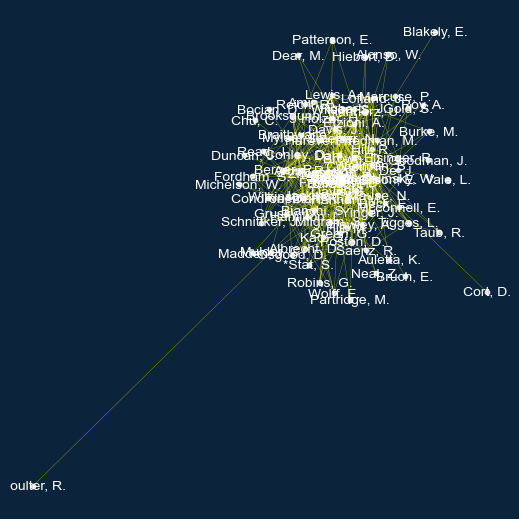

In [63]:
# I can't figure out how, but the edges should be colored / sized by their LOG(weight)

nodes = G.nodes()
degree = G.degree(weight=True)
print(degree)
colors = np.array([degree[n] for n in nodes])
colors = 250*colors / np.max(colors)
#size = [(degree[n]) for n in nodes]

pos = nx.kamada_kawai_layout(G)
#pos = nx.spring_layout(G, k = 0.2)
cmap = plt.cm.viridis_r
cmap = plt.cm.Greys

vmin = min(colors)
vmax = max(colors)

fig = plt.figure(figsize = (5,5), dpi=100)
nx.draw(G,pos,alpha = 0.8, nodelist = nodes, node_color = 'w', node_size = 10, font_size = 6, width = 0.2, cmap = cmap, edge_color ='yellow')
nx.draw_networkx_labels(G,pos,font_color='w',font_size=10)
fig.set_facecolor('#0B243B')

plt.show()